In [1]:
using DelimitedFiles, Printf, LinearAlgebra, Random; Random.seed!()
using NevanlinnaAC, Optim, Zygote
using NevanlinnaAC: loss_bose, gradient_function
using Plots

function read_GF_data(path::String)
    data = readdlm(path, skipstart = 2)
    x = map(x->convert(ComplexF64, x), data[2:end,1]) 
    y = data[2:end,2] .+ 1.0im .* data[2:end,3]
    g0 = data[1,2]
    return g0, x, y
end

read_GF_data (generic function with 1 method)

In [8]:
Aw_exact = readdlm("./data/Aw_hubbard_M_point.txt", skipstart = 2)
path = "./data/giwn_hubbard_M_point.txt"
path_noise = "./data/giwn_hubbard_M_point_noise.txt"

g0, xdata, ydata = read_GF_data(path);
g0_noise, xdata_noise, ydata_noise = read_GF_data(path_noise);

In [10]:
ωmax = 2π;  Nω = 500; η=0.05;
Nf = 20
w0, A0 = spectral_function(Bose, xdata[1:Nf], ydata[1:Nf], g0; ωmax, Nω, η);
w0_noise, A0_noise = spectral_function(Bose, xdata_noise[1:Nf], ydata_noise[1:Nf], g0_noise; ωmax, Nω, η);

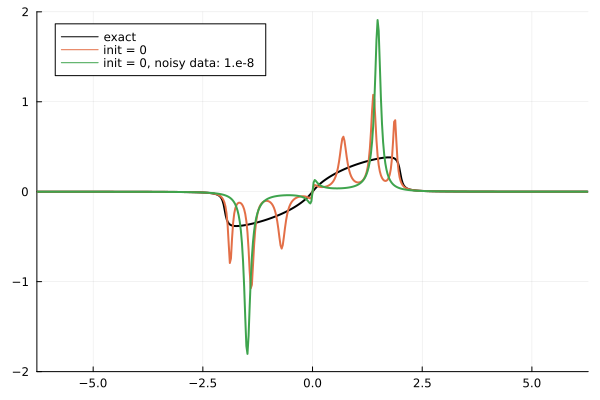

In [11]:
#plot init = 0 
plot(Aw_exact[:,1], Aw_exact[:,2], line=(:black, 2), label="exact")
plot!(w0, A0, line=(2), label="init = 0")
plot!(w0_noise, A0_noise, line=(2), label="init = 0, noisy data: 1.e-8")
plot!(xlim = (-2π, 2π), legend=:topleft)
plot!(ylim=(-2,2))

In [12]:
#loss functions
loss = params -> loss_bose(params, xdata[1:Nf], ydata[1:Nf], g0; ωmax, Nω, η, λ = 1.e-5)

#13 (generic function with 1 method)

In [13]:
Nh = 6
p0 = zeros(2Nh)
res = Optim.optimize(loss, gradient_function(loss, p0), p0, LBFGS(), Optim.Options(show_trace=true, show_every=10, iterations = 500))

Iter     Function value   Gradient norm 
     0     1.467687e+01     7.449901e+00
 * time: 0.026453018188476562


    10     1.406034e-01     5.980612e-01
 * time: 56.870952129364014


    20     4.239410e-02     9.305373e-02
 * time: 108.09789609909058


    30     3.429770e-02     3.711386e-02
 * time: 156.31796598434448


    40     1.523655e-02     2.067560e-02
 * time: 202.97918915748596


    50     1.402366e-02     1.393883e-02
 * time: 251.62927198410034


    60     1.179638e-02     4.232975e-02
 * time: 295.718955039978


    70     1.122098e-02     7.093094e-03
 * time: 336.26482701301575


    80     1.061870e-02     3.713844e-02
 * time: 381.5918290615082


    90     1.027942e-02     7.322458e-04
 * time: 427.420205116272


   100     1.027891e-02     1.434533e-05
 * time: 469.57202911376953


   110     1.027891e-02     7.286681e-08
 * time: 512.5440011024475


 * Status: success

 * Candidate solution
    Final objective value:     1.027891e-02

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 5.90e-08 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.92e-08 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.09e-16 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.98e-14 ≰ 0.0e+00
    |g(x)|                 = 9.62e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   528  (vs limit Inf)
    Iterations:    113
    f(x) calls:    327
    ∇f(x) calls:   327


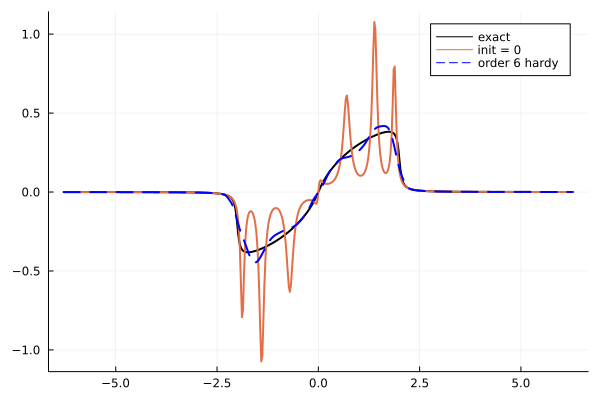

In [15]:
w1, A1= spectral_function(Bose, xdata[1:Nf], ydata[1:Nf], g0, res.minimizer; ωmax, Nω, η);
plot(Aw_exact[:,1], Aw_exact[:,2], line=(:black, 2), label="exact")
plot!(w0, A0, line=(2), label="init = 0")
plot!(w1, A1, line=(2, :dash, :blue), label="order $(Nh) hardy")

In [30]:
loss_noise = params -> loss_bose(params, xdata_noise[1:Nf], ydata_noise[1:Nf], g0_noise; ωmax, Nω, η, λ = 1.e-6)

#19 (generic function with 1 method)

In [31]:
res_noise = Optim.optimize(loss_noise, gradient_function(loss_noise, p0), p0, LBFGS(), Optim.Options(show_trace=true, show_every=10, iterations = 500))

Iter     Function value   Gradient norm 
     0     1.239780e+00     1.200175e+00
 * time: 5.2928924560546875e-5


    10     1.241302e-01     8.422483e-02
 * time: 43.50704002380371


    20     7.216639e-02     2.998661e-02
 * time: 91.40647196769714


    30     6.797155e-02     7.846061e-03
 * time: 138.10366201400757


    40     6.763366e-02     1.025622e-02
 * time: 189.47012281417847


    50     6.536000e-02     2.122916e-02
 * time: 252.72907400131226


    60     6.269610e-02     1.527175e-02
 * time: 294.91798090934753


    70     6.230385e-02     2.904530e-03
 * time: 341.5055408477783


    80     6.228281e-02     9.429296e-04
 * time: 393.0208179950714


    90     5.989785e-02     4.029828e-02
 * time: 444.0396828651428


   100     5.864694e-02     8.560299e-03
 * time: 489.6217739582062


   110     5.714869e-02     8.785028e-03
 * time: 533.1071557998657


   120     5.702334e-02     8.242133e-03
 * time: 582.9989449977875


   130     5.664297e-02     3.215463e-02
 * time: 631.1733429431915


   140     5.593074e-02     3.566738e-03
 * time: 670.9367389678955


   150     5.592041e-02     5.166224e-03
 * time: 717.7658648490906


   160     5.480445e-02     1.295998e-02
 * time: 764.6827988624573


   170     5.473612e-02     3.895886e-03
 * time: 806.9740018844604


   180     5.473324e-02     1.217573e-05
 * time: 851.8096568584442


   190     5.473324e-02     9.683180e-08
 * time: 898.3406319618225


 * Status: success (objective increased between iterations)

 * Candidate solution
    Final objective value:     5.473324e-02

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 3.11e-08 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.22e-09 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.47e-17 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.34e-16 ≰ 0.0e+00
    |g(x)|                 = 6.97e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   930  (vs limit Inf)
    Iterations:    197
    f(x) calls:    579
    ∇f(x) calls:   579


In [34]:
w1_noise, A1_noise= spectral_function(Bose, xdata_noise[1:Nf], ydata_noise[1:Nf], g0_noise, res_noise.minimizer; ωmax, Nω, η);

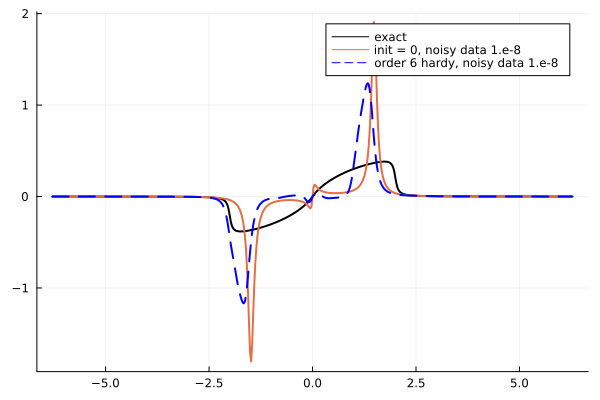

In [35]:
plot(Aw_exact[:,1], Aw_exact[:,2], line=(:black, 2), label="exact")
plot!(w0_noise, A0_noise, line=(2), label="init = 0, noisy data 1.e-8")
plot!(w1_noise, A1_noise, line=(2, :dash, :blue), label="order $(Nh) hardy, noisy data 1.e-8")